# Building intuition about correlations (and a bit of Python linear algebra)

In [7]:
%matplotlib inline  

import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 



## Demo of linear algebra

In [53]:
Sigma = np.array([[1,  0],
                  [0, -1]])

# Here we note the distinction between a numpy 1d list as a vector and
#  a vector as a matrix with one column.
x_vec = np.array([2, 3])
print('shape before: ', x_vec.shape)

print('vector-matrix-vector multiplication: ', x_vec @ Sigma @ x_vec)

x_vec = x_vec.reshape(-1,1)  # convert to matrix column vector
print('\nshape after: ', x_vec.shape)

print(x_vec)   # column vector as matrix
print('\n')
print(x_vec.T) # row vector as matrix


shape before:  (2,)
vector-matrix-vector multiplication:  -5

shape after:  (2, 1)
[[2]
 [3]]


[[2 3]]


**Predict the result!**

In [ ]:
print(x_vec.T @ x_vec)

In [ ]:
print(x_vec.T @ Sigma @ x_vec)

In [41]:
print(x_vec @ x_vec)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [42]:
print(x_vec @ x_vec.T)


[[4 6]
 [6 9]]


## Predict the contour!

In [8]:
def covar(sigma_1, sigma_2, rho):
    """
    Return a symmetric 2x2 covariance matrix.
    """
    mat = np.array( [[sigma_1**2,          rho*sigma_1*sigma_2] , 
                     [rho*sigma_1*sigma_2, sigma_2**2         ]])   
    return mat

def log_posterior(x_vec, Sigma):
    """
    Logarithm of bivariate gaussian.
    """
    return -x_vec.T @ inv(Sigma) @ x_vec

In [62]:
def plot_contour(sigma_1, sigma_2, rho):
    """
    Make a plot
    """
    Sigma = covar(sigma_1, sigma_2, rho)
    
    x1_max = 3.; x2_max = 3.
    x1_pts = np.arange(-x1_max, x1_max, .05)  # You may want to adjust the 
    x2_pts = np.arange(-x2_max, x2_max, .05)  #  density of points used.
    x1_grid, x2_grid = np.meshgrid(x1_pts, x2_pts)  
    
    Z_grid = np.array([[log_posterior(np.array([x1, x2]), Sigma) 
                        for x1 in x1_pts] for x2 in x2_pts])
    Z_grid = np.exp(Z_grid - np.max(Z_grid))  # normalize the peak to be 1

    
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    contour_levels = [0.2, 0.4, 0.6, 0.8, 1.0]
    axes[0].contour(x1_grid, x2_grid, Z_grid, levels=contour_levels)
    axes[0].set_xlim(-x1_max, x1_max)
    axes[0].set_ylim(-x2_max, x2_max)
    axes[0].set_xlabel(r'$x_1$')
    axes[0].set_ylabel(r'$x_2$')
    axes[0].set_title('Contour plot with levels 0.2, 0.4, 0.6, 0.8, 1.0')
        
    axes[1].contourf(x1_grid, x2_grid, Z_grid, levels=5, cmap='jet')
    axes[1].set_xlim(-x1_max, x1_max)
    axes[1].set_ylim(-x2_max, x2_max)
    axes[1].set_xlabel(r'$x_1$')
    axes[1].set_ylabel(r'$x_2$')
    axes[1].set_title('Color contour plot with contourf')


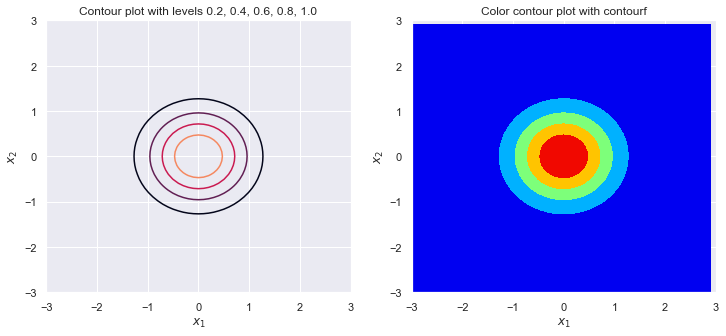

In [57]:
sigma_1 = 1
sigma_2 = 1
rho = 0

plot_contour(sigma_1, sigma_2, rho)

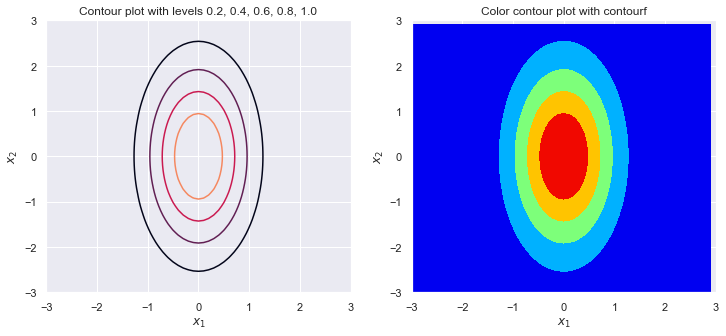

In [58]:
sigma_1 = 1
sigma_2 = 2
rho = 0

plot_contour(sigma_1, sigma_2, rho)

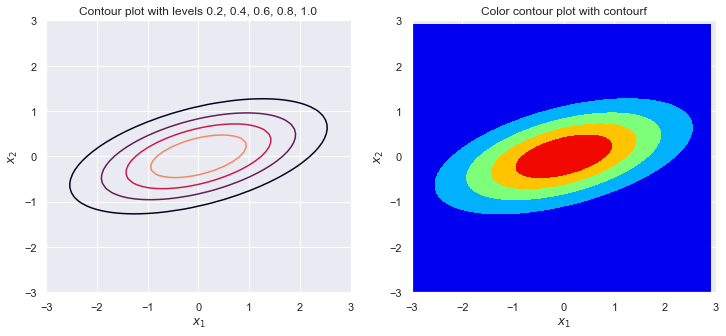

In [59]:
sigma_1 = 2
sigma_2 = 1
rho = .5

plot_contour(sigma_1, sigma_2, rho)

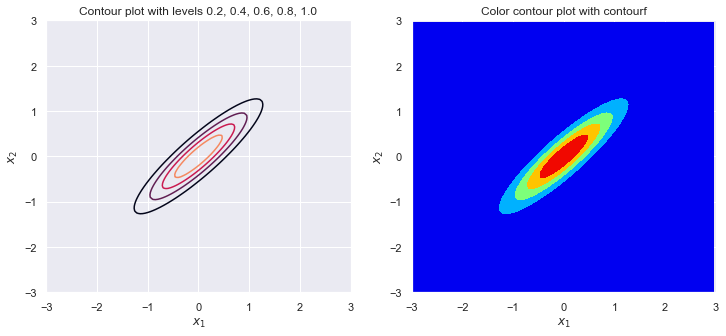

In [64]:
sigma_1 = 1
sigma_2 = 1
rho = .9

plot_contour(sigma_1, sigma_2, rho)

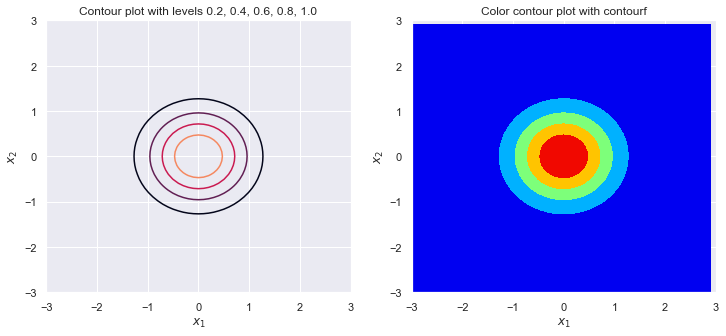

In [57]:
sigma_1 = 1
sigma_2 = 1
rho = .99

plot_contour(sigma_1, sigma_2, rho)